In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 中心化
### 中心化后，数据都集中在(0,0)坐标点附近

In [85]:
x = np.linspace(4,8,100)
y = [i + np.random.normal() for i in x] 

In [86]:
M = np.vstack([x,y]).T
#df_M = pd.DataFrame(M)
#df_M.head()

In [89]:
#df_D = df_M - df_M.mean()
#df_D.head()
D = M-M.mean(axis=0)

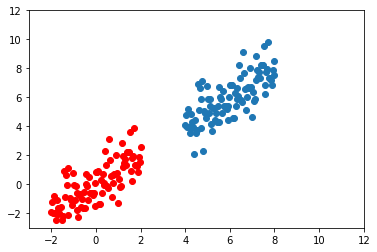

In [90]:
plt.axis([-3, 12, -3, 12])
plt.scatter(x,y)
plt.scatter(D[:,:-1],D[:,-1], color="red")

# sklearn 归一化

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [94]:
#实现归一化
#实例化
scaler = MinMaxScaler()     
#fit，在这里本质是生成min(x)和max(x)
scaler = scaler.fit(data)     
#通过接口导出结果
result = scaler.transform(data)                     
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [96]:
#训练和导出结果一步达成
result_ = scaler.fit_transform(data)      
#将归一化后的结果逆转
scaler.inverse_transform(result)                    

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## 使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中

In [97]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
#依然实例化
scaler = MinMaxScaler(feature_range=[5,10])        
#fit_transform一步导出结果
result = scaler.fit_transform(data)                 
result
#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

## sklearn标准化

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
#实例化
scaler = StandardScaler()              
#fit，本质是生成均值和方差
scaler.fit(data)                                    
#查看均值的属性mean_ 
scaler.mean_       
#查看方差的属性var_
scaler.var_                                        
#通过接口导出结果 
x_std = scaler.transform(data)                      
#导出的结果是一个数组，用mean()查看均值 
x_std.mean()       
#用std()查看方差
x_std.std()                                        
#使用fit_transform(data)一步达成结果 
scaler.fit_transform(data)                          
#使用fit_transform(data)一步达成结果#使用inverse_transform逆转标准化 
scaler.inverse_transform(x_std)                     

## 数据处理

In [116]:
from sklearn.impute import SimpleImputer

In [135]:
data = pd.read_csv(r"Narrativedata.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [119]:
#填补年龄,sklearn当中特征矩阵必须是二维
Age = data.loc[:,"Age"].values.reshape(-1,1)            
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [120]:
#实例化，默认均值填补
imp_mean = SimpleImputer()   
imp_mean = imp_mean.fit_transform(Age)    

#用中位数填补
imp_median = SimpleImputer(strategy="median")        
imp_median = imp_median.fit_transform(Age)

#用0填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0)
imp_0 = imp_0.fit_transform(Age)

In [121]:
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [125]:
data = pd.read_csv(r"Narrativedata.csv",index_col=0)
#.fillna 在DataFrame里面直接进行填补
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False
#data.dropna(axis=0,inplace=True)
data.info

<bound method DataFrame.info of       Age     Sex Embarked Survived
0    22.0    male        S       No
1    38.0  female        C      Yes
2    26.0  female        S      Yes
3    35.0  female        S      Yes
4    35.0    male        S       No
5    28.0    male        Q       No
6    54.0    male        S       No
7     2.0    male        S       No
8    27.0  female        S      Yes
9    14.0  female        C      Yes
10    4.0  female        S  Unknown
11   58.0  female        S      Yes
12   20.0    male        S       No
13   39.0    male        S       No
14   14.0  female        S       No
15   55.0  female        S  Unknown
16    2.0    male        Q       No
17   28.0    male        S      Yes
18   31.0  female        S       No
19   28.0  female        C      Yes
20   35.0    male        S  Unknown
21   34.0    male        S      Yes
22   15.0  female        Q      Yes
23   28.0    male        S      Yes
24    8.0  female        S       No
25   38.0  female        S  Unkn

## 处理分类型特征：编码与哑变量
在机器学习中，大多数算法，譬如逻辑回归，支持向量机SVM，k近邻算法等都只能够处理数值型数据，不能处理
文字，在sklearn当中，除了专用来处理文字的算法，其他算法在ﬁt的时候全部要求输入数组或矩阵，也不能够导
入文字型数据（其实手写决策树和普斯贝叶斯可以处理文字，但是sklearn中规定必须导入数值型）。然而在现实
中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的。比如说，学历的取值可以是["小学"，“初
中”，“高中”，"大学"]，付费方式可能包含["支付宝"，“现金”，“微信”]等等。在这种情况下，为了让数据适应算法和
库，我们必须将数据进行编码，即是说，将文字型数据转换为数值型。

In [126]:
from sklearn.preprocessing import LabelEncoder
#要输入的是标签，不是特征矩阵，所以允许一维 
y = data.iloc[:,-1]                         
#实例化 
le = LabelEncoder()        
#导入数据
le = le.fit(y)      
#属性.classes_查看标签中究竟有多少类别
le.classes_               

array(['No', 'Unknown', 'Yes'], dtype=object)

In [130]:
#transform接口调取结果
label = le.transform(y)   
#查看获取的结果label
label                      

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [131]:
#也可以直接fit_transform一步到位
le.fit_transform(y)                         
#使用inverse_transform可以逆转 
le.inverse_transform(label)
#让标签等于我们运行出来的结果
data.iloc[:,-1] = label
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [133]:
#如果不需要教学展示的话我会这么写：
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


## 特征专用，能够将分类特征转换为分类数值

In [4]:
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv("Narrativedata.csv",index_col=0)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
data.loc[:,"Embarked"] = data.loc[:,"Embarked"].fillna('S')

#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
data_ = data.copy()
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [161]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [162]:
OrdinalEncoder().fit(data.iloc[:,1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [163]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,No
1,38.0,0.0,0.0,Yes
2,26.0,0.0,2.0,Yes
3,35.0,0.0,2.0,Yes
4,35.0,1.0,2.0,No


## 哑变量 one-hot

In [164]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [165]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
# 自动判断哪些特征中有哪些类别
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [166]:
#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
OneHotEncoder(categories='auto').fit_transform(X).toarray()
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [168]:
result
result.shape
#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,No,0.0,1.0,0.0,0.0,1.0
1,38.0,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,No,0.0,1.0,0.0,0.0,1.0


### 稀疏矩阵

In [55]:
from sklearn.feature_extraction import DictVectorizer

temData = [{'Country': 'China','temperature': 80},
         {'Country': 'India','temperature': 90},
         {'Country': 'Brazil','temperature': 100}]
# 当sparse=True返回稀疏矩阵
dv = DictVectorizer(sparse=True)
mixData = dv.fit_transform(temData)
print(mixData)

  (0, 1)	1.0
  (0, 3)	80.0
  (1, 2)	1.0
  (1, 3)	90.0
  (2, 0)	1.0
  (2, 3)	100.0


In [56]:
#获取编码后的特征名称
dictV.get_feature_names()

['Country=Brazil', 'Country=China', 'Country=India', 'temperature']

In [53]:
#将矩阵转换成字典
dv.inverse_transform(mixData)

[{'Country=China': 1.0, 'temperature': 80.0},
 {'Country=India': 1.0, 'temperature': 90.0},
 {'Country=Brazil': 1.0, 'temperature': 100.0}]

## 处理连续型特征：二值化与分段
### 二值化：sklearn.preprocessing.Binarizer
根据阈值将数据二值化（将特征值设置为0或1），用于处理连续型变量。大于阈值的值映射为1，而小于或等于阈
值的值映射为0。默认阈值为0时，特征中所有的正值都映射到1。二值化是对文本计数数据的常见操作，分析人员
可以决定仅考虑某种现象的存在与否。它还可以用作考虑布尔随机变量的估计器的预处理步骤（例如，使用贝叶斯
设置中的伯努利分布建模）。

In [8]:
#将年龄二值化
data_s = data.copy()

## 按年龄界限，将年龄划分成两种编码

In [11]:
from sklearn.preprocessing import Binarizer
#类为特征专用，所以不能使用一维数组
Age = data_s.iloc[:,0].values.reshape(-1,1)    
#小于30岁编码为0，大于30编码为1
transformer = Binarizer(threshold=30).fit_transform(Age)
data_s['Age'] = transformer
data_s.head()

,Age,Sex,Embarked,Survived,age
0,0.0,male,S,No,0.0
1,1.0,female,C,Yes,1.0
2,0.0,female,S,Yes,0.0
3,1.0,female,S,Yes,1.0
4,1.0,male,S,No,1.0


## preprocessing.KBinsDiscretizer
这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。总共包含三个重要参数：
n_bins 每个特征中分箱的个数，默认5，一次会被运用到所有导入的特征
encode
编码的方式，默认“onehot” 
"onehot"：做哑变量，之后返回一个稀疏矩阵，每一列是一个特征中的一个类别，含有该 
类别的样本表示为1，不含的表示为0 
“ordinal”：每个特征的每个箱都被编码为一个整数，返回每一列是一个特征，每个特征下含 
有不同整数编码的箱的矩阵 
"onehot-dense"：做哑变量，之后返回一个密集数组。
strategy
用来定义箱宽的方式，默认"quantile" 
"uniform"：表示等宽分箱，即每个特征中的每个箱的最大值之间的差为 
(特征.max() - 特征.min())/(n_bins) 
"quantile"：表示等位分箱，即每个特征中的每个箱内的样本数量都相同 
"kmeans"：表示按聚类分箱，每个箱中的值到最近的一维k均值聚类的簇心得距离都相同

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
Age = data.iloc[:,0].values.reshape(-1,1) 

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(Age)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [28]:
est.bin_edges_

array([array([ 0.42      , 26.94666667, 53.47333333, 80.        ])],
      dtype=object)

In [ ]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(Age).ravel())

In [29]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(Age).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [30]:
est.bin_edges_

array([array([ 0.42      , 26.94666667, 53.47333333, 80.        ])],
      dtype=object)

## 中文文本数据处理

In [64]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [71]:
def cut_word(txt):
    return " ".join(jieba.cut(txt))
cut_word("我爱北京天安门")    

'我 爱 北京 天安门'

In [72]:
# 将中文文本进行分词
data = ["我爱北京天安门", "天安门上太阳升"]
data_new = []
for sent in data:
    data_new.append(cut_word(sent))
data_new

['我 爱 北京 天安门', '天安门 上 太阳升']

In [73]:
# 文本词语统计器，stop_words可以指定要过滤掉的词语
transfer = CountVectorizer(stop_words=["升", "上"])

# 2、调用fit_transform
data_final = transfer.fit_transform(data_new)
print("data_new:\n", data_final.toarray())
print("特征名字：\n", transfer.get_feature_names())

data_new:
 [[1 1 0]
 [0 1 1]]
特征名字：
 ['北京', '天安门', '太阳升']


## TF-Idf提取

In [74]:
# 将中文文本进行分词
data = ["我爱北京天安门", "天安门上太阳升"]
data_new = []
for sent in data:
    data_new.append(cut_word(sent))

# Tfidf特征词提取器，stop_words可以指定要过滤掉的词语
transfer = TfidfVectorizer(stop_words=["升", "上"])

# 调用fit_transform
data_final = transfer.fit_transform(data_new)
print("data_new:\n", data_final.toarray())
print("特征名字：\n", transfer.get_feature_names())

data_new:
 [[0.81480247 0.57973867 0.        ]
 [0.         0.57973867 0.81480247]]
特征名字：
 ['北京', '天安门', '太阳升']


# 降维

## 方差过滤法

In [109]:
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr

# 1、获取数据
data = pd.read_csv("factor_returns.csv")
data = data.iloc[:, 1:-2]
print("data:\n", data.head(2), data.shape)

data:
    pe_ratio  pb_ratio    market_cap  return_on_asset_net_profit  \
0    5.9572    1.1818  8.525255e+10                      0.8008   
1    7.0289    1.5880  8.411336e+10                      1.6463   

   du_return_on_equity            ev  earnings_per_share       revenue  \
0              14.9403  1.211445e+12               2.010  2.070140e+10   
1               7.8656  3.002521e+11               0.326  2.930837e+10   

   total_expense  
0   1.088254e+10  
1   2.378348e+10   (2318, 9)


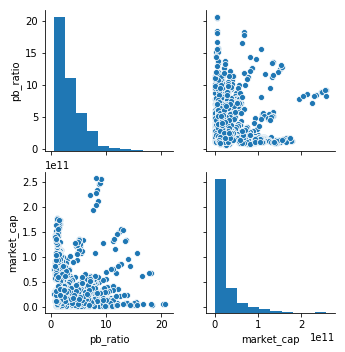

In [110]:
import seaborn as sns
sns.pairplot(data.iloc[:, 1:3])

In [111]:
# 2、实例化一个转换器类，方差低于threshold值的特征都将被多虑掉
transfer = VarianceThreshold(threshold=10)

# 3、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new, data_new.shape)

data_new:
 [[ 5.95720000e+00  8.52525509e+10  8.00800000e-01 ...  1.21144486e+12
   2.07014010e+10  1.08825400e+10]
 [ 7.02890000e+00  8.41133582e+10  1.64630000e+00 ...  3.00252062e+11
   2.93083692e+10  2.37834769e+10]
 [-2.62746100e+02  5.17045520e+08 -5.67800000e-01 ...  7.70517753e+08
   1.16798290e+07  1.20300800e+07]
 ...
 [ 3.95523000e+01  1.70243430e+10  3.34400000e+00 ...  2.42081699e+10
   1.78908166e+10  1.74929478e+10]
 [ 5.25408000e+01  3.28790988e+10  2.74440000e+00 ...  3.88380258e+10
   6.46539204e+09  6.00900728e+09]
 [ 1.42203000e+01  5.91108572e+10  2.03830000e+00 ...  2.02066110e+11
   4.50987171e+10  4.13284212e+10]] (2318, 7)


## 计算皮尔逊相关系数

In [112]:
# 计算某两个变量之间的相关系数,返回一个tuple(相关系数，不相关的概率)
r1 = pearsonr(data["pe_ratio"], data["pb_ratio"])
print("相关系数：\n", r1)
r2 = pearsonr(data['revenue'], data['total_expense'])
print("revenue与total_expense之间的相关性：\n", r2)

相关系数：
 (-0.004389322779936274, 0.8327205496591377)
revenue与total_expense之间的相关性：
 (0.9958450413136111, 0.0)


## PCA降维度

In [107]:
from sklearn.decomposition import PCA

data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

"""
1、实例化一个转换器类
n_components是一个整数时，表示保留的维度数量
n_components是一个小数时，表示保留的维度的百分比
"""
transfer = PCA(n_components=0.95)

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("维度变化:\n", np.array(data).shape,'=>',np.array(data_new).shape)
print("降维后的数据:\n", data_new)

维度变化:
 (3, 4) => (3, 2)
降维后的数据:
 [[ 1.28620952e-15  3.82970843e+00]
 [ 5.74456265e+00 -1.91485422e+00]
 [-5.74456265e+00 -1.91485422e+00]]
